# Notebook Monte-Carlo sur le nombre de simulations

In [89]:
# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import matplotlib.ticker as mtick
import numpy as np              # package for scientific computing  
import random as rd
import math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline  

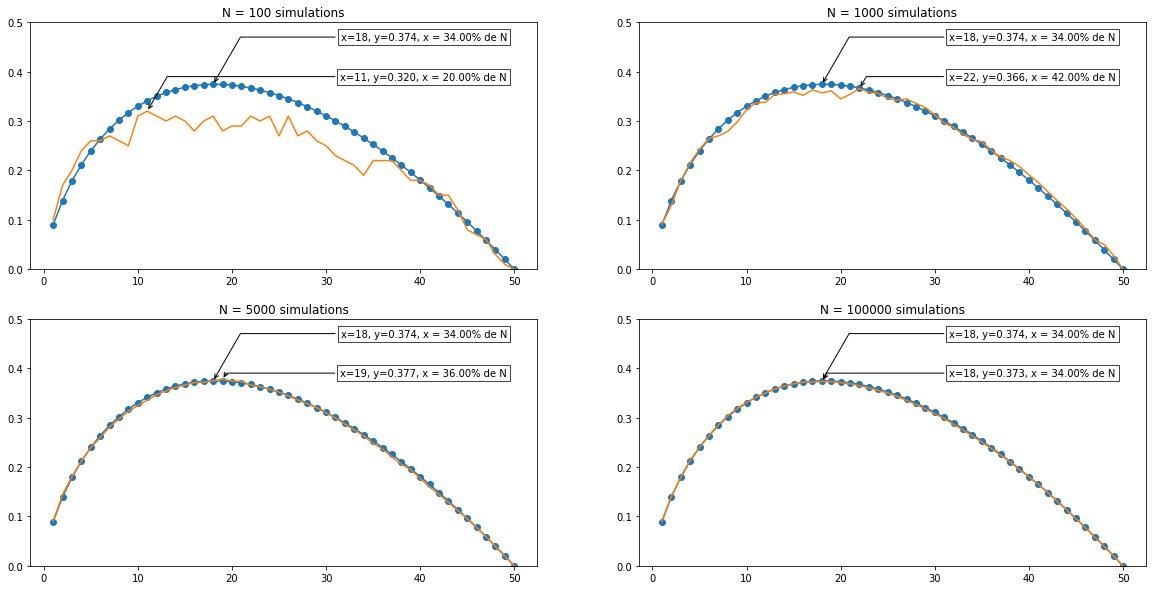

<Figure size 2880x2880 with 0 Axes>

In [11]:
#3
def annot_max(x,y, ax, coord):
    xmax = np.argmax(y)
    ymax = max(y)
    text= "x={:.0f}, y={:.3f}, x = {:.2f}% de N".format(xmax+1, ymax, 100*xmax/(len(y)))
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax+1, ymax), xytext=coord, **kw)

#TEORIQUE
def p_nk(k, N):
    if k==0:
        return 0
    else:
        return k/N * sum([1/i for i in range(k, N)])

def graph(N, g):
    v = [p_nk(i, N) for i in range(1,N+1)]
    annot_max(range(1,N+1), v, g, (0.94,0.96))
    if(N<=50):
        g.plot(range(1,N+1),v,'-o')
    else:
        g.plot(range(1,N+1),v)
    return
    
#MONTE CARLO
def sim(N,k,x):
    comp = min(x[0:k])
    #print(x[0:k], comp)
    l=-1
    for i in range(k,N):
        if(comp!= 1 and x[i]<comp):
            l = i
            break
    #print(l)
    
    if(l!=-1 and x[l]==1):
        return True, l+1
    else:
        return False, -1
    
def run(N,Num):
    s = [0]*(N+1)
    for i in range(0,Num):
        x = [*range(1,N+1)]
        rd.shuffle(x)
        for k in range(1,N+1):
            if(sim(N,k,x)[0]):
                s[k]+=1
    return [t/Num for t in s[1:]]

#Assemble
def assm(N,Num, g):
    #theorique
    graph(N,g)
    #monte carlo
    v = run(N,Num)
    g.plot(range(1,N+1), v)
    annot_max(range(1,N+1), v, g, (0.94,0.80))
    return


fig, ax = plt.subplots(2,2)
fig = plt.figure(figsize=(40,40))
fig.suptitle('Num', fontsize=16)

plt.rcParams["figure.figsize"] = [20, 10]
#plt.rcParams["figure.autolayout"] = True

plt.setp(ax, ylim=(0,0.5))

ax[0][0].title.set_text('N = 100 simulations')
ax[0][1].title.set_text('N = 1000 simulations')
ax[1][0].title.set_text('N = 5000 simulations')
ax[1][1].title.set_text('N = 100000 simulations')

N = 50
assm(N,100,ax[0][0])
assm(N,1000,ax[0][1])
assm(N,10000,ax[1][0])
assm(N,100000,ax[1][1])

fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.savefig('results.png')
plt.show()


TypeError: scatter() missing 1 required positional argument: 'y'

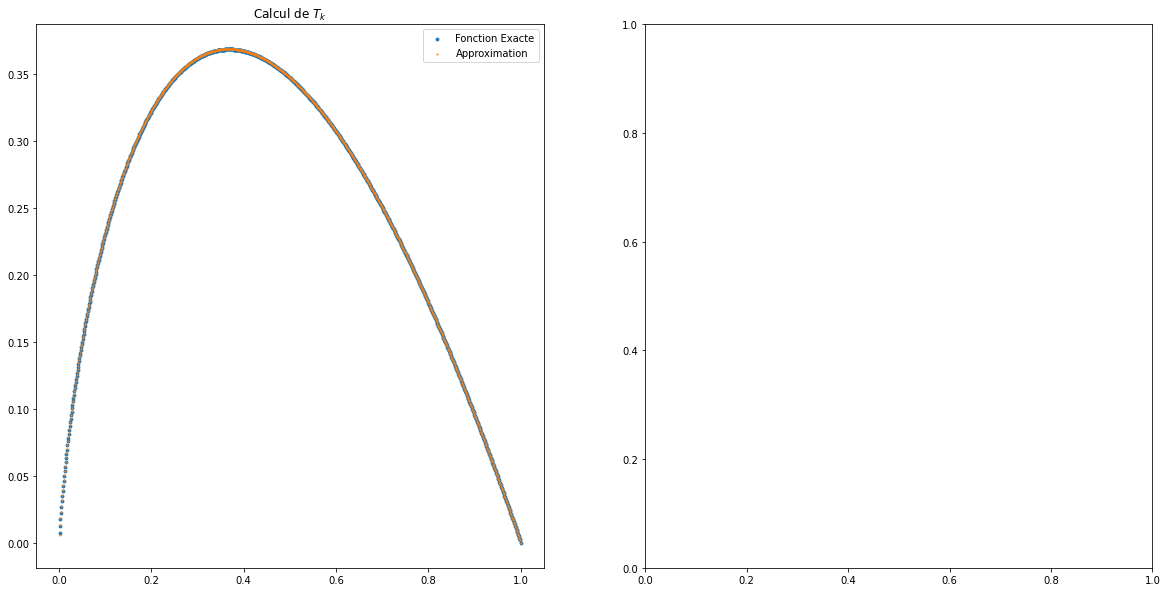

<Figure size 2880x2880 with 0 Axes>

In [ ]:
#Aprox H_n
def Hn(n):
    return sum([1/i for i in range(1, n+1)])

def Apr_Hn(n):
    return math.log(n)

def compare_1(N):
    v,w = ([Hn(i) for i in range(1,N+1)],[Apr_Hn(i) for i in range (1,N+1)])
    plt.plot(v)
    plt.plot(w)
    plt.show()
    return v[N-1]-w[N-1]

#Comparing differences in H_n
def f_t(k,N):
    return k/N*(Hn(N-1)-Hn(k-1))

def f_a(k,N):
    if k==1:
        return k/N*(math.log(N-1)-1)
    else:
        return k/N*math.log((N-1)/(k-1))

#Plot Compare
def compare_2(N, g):
    v, w = ([f_t(math.floor(i*N), N) for i in np.linspace(1/N, 1, num=N-1)],[f_a(math.floor(i*N), N) for i in np.linspace(1/N, 1, num=N-1)])
    l1 = g.scatter(np.linspace(1/N, 1, num=N-1), v, s=8)
    l2 = g.scatter(np.linspace(1/N, 1, num=N-1), w, s=1)
    l1.set_label('Fonction Exacte')
    l2.set_label('Approximation')
    g.title.set_text('Calcul de $T_k$')
    g.legend()
    return np.argmax(v)/N, np.argmax(w)/N 

def aux(N):
    v, w = (np.array([f_t(math.floor(i*N), N) for i in np.linspace(1/N, 1, num=N-1)]), np.array([f_a(math.floor(i*N), N) for i in np.linspace(1/N, 1, num=N-1)]))
    r = [(w[i]-v[i])/v[i] for i in range(100,N-2)]
    return v,w,r

def ret(N):
    v,w,r = aux(N)
    return [list(range(100,N-2))[i]/N for i in range(len(range(100,N-2)))], 100*np.array(r)

def compare_3(N, g):
    v, w, r = aux(N)
    g.plot(ret(N))        
    g.title.set_text('Difference percentuelle')
    g.yaxis.set_major_formatter(mtick.PercentFormatter())
    return    

def vecs(n,k):
    v,w,r = aux(n)
    return r[k]

X = []
Y = []
Z = []

for n in range(100,1000,20):
    for k in range(1,k,5):
        x.append(n)
        y.append(k)
        z.append(vecs(n,k))

x = np.reshape(X, (len(range(100,1000,20)), 12))
y = np.reshape(Y, (9, 12))
z = np.reshape(Z, (9, 12))

        
        
def comp3d():
    x = np.linspace(100, 1000, 900)
    y = np.linspace(0, 1, 900)

    K = np.arange(1, 1000, 1)
    N = np.arange(1, 1000, 1)  
    
    K, N = np.meshgrid(x, y)
    Z = f_3d(K, N)

    Axes3D.plot_surface(X, Y, Z, *args, **kwargs)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');
    plt.show()
    return

N=1000
fig, ax = plt.subplots(1,2)
fig = plt.figure(figsize=(40,40))
fig.suptitle('Num', fontsize=16)

plt.rcParams["figure.figsize"] = [20, 10]

compare_2(N,ax[0])
compare_3(N,ax[1])

#comp3d()